# Task 2: Develop Time Series Forecasting Models
- Train and Forecast BND asset


**Model Selection**

Given the options of traditional statistical models (ARIMA, SARIMA) and a deep learning model (LSTM) for time series forecasting,

First, import required libraries and script modules

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor
from model_training import ModelTrainer
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

2024-11-17 10:40:03.150368: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 10:40:05.693075: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 10:40:07.042447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731858007.118468   32693 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731858009.462372   32693 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Loading the Data**

In [2]:
# Initialize class instances
path = '../data/'
processor = DataPreprocessor(data_dir = path, logger=logger)

# Load the data
tsla_data = processor.load_data('BND')


**Prepare the data for Modeling**

In [3]:
# Create trainer instance of ModelTrainer
trainer = ModelTrainer(tsla_data, logger=logger)
# Prepare the data for modeling
trainer.prepare_data()


**Step 1: Train the ARIMA Model**

- optimize the parameters with auto_arima

In [4]:
trainer.train_arima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17453.801, Time=2.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17457.593, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17457.787, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17457.908, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17459.527, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17457.495, Time=1.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.511 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2884
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8730.763
Date:                Sun, 17 Nov 2024   AIC                         -17459.527
Time:                        10:40:49   BIC                         -17453.560
Sample:                    01-02-2015   HQIC                        -17457.37

**Step 2: Train the SARIMA Model**

- optimize the parameters with auto_arima

In [5]:
trainer.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=12.93 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-15374.956, Time=1.44 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-16333.717, Time=6.66 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=12.42 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-15373.117, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-16612.542, Time=3.93 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=15.52 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=19.61 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-16614.357, Time=5.04 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=-16335.142, Time=5.25 sec
 ARIMA(0,1,0)(2,1,1)[5]             : AIC=inf, Time=15.38 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-16612.526, Time=3.18 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-16610.009, Time=7.34 sec
 ARIMA(0,1,0)(2,1,0)[5] intercept   : AIC=-16612.361, Time=8.14 sec

Best model:  ARIMA(0,1,0)(2,1,0)[5

**Step 3: Train LSTM model**

2024-11-17 10:42:49.478673: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - loss: 0.0970 - val_loss: 0.0017
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0060 - val_loss: 0.0021
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - loss: 0.0039 - val_loss: 0.0017
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - loss: 0.0031 - val_loss: 0.0018


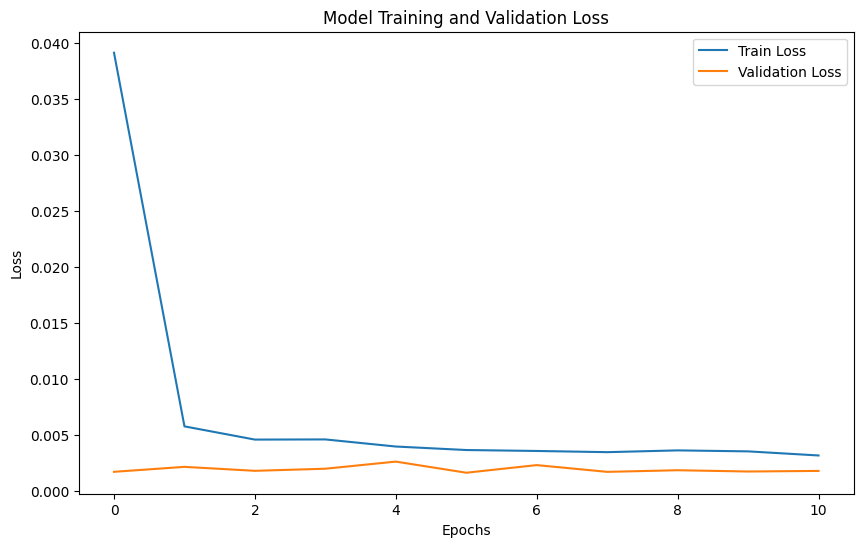

In [6]:
trainer.train_lstm()

**Step 4: Make Predictions**

In [7]:
trainer.make_prediction()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

**Step 5: Evaluate the models**

The models are evaluating using
- MAE, RSME, MAPE

In [8]:
trainer.evaluate_model()


Model Evaluation Metrics:
     Model       MAE      RMSE         MAPE
0   ARIMA  0.062817  0.081337   132.209744
1  SARIMA  3.106305  3.581739  2980.236637
2    LSTM  0.157290  0.173338    90.136163


**Step 6: Compare the models**

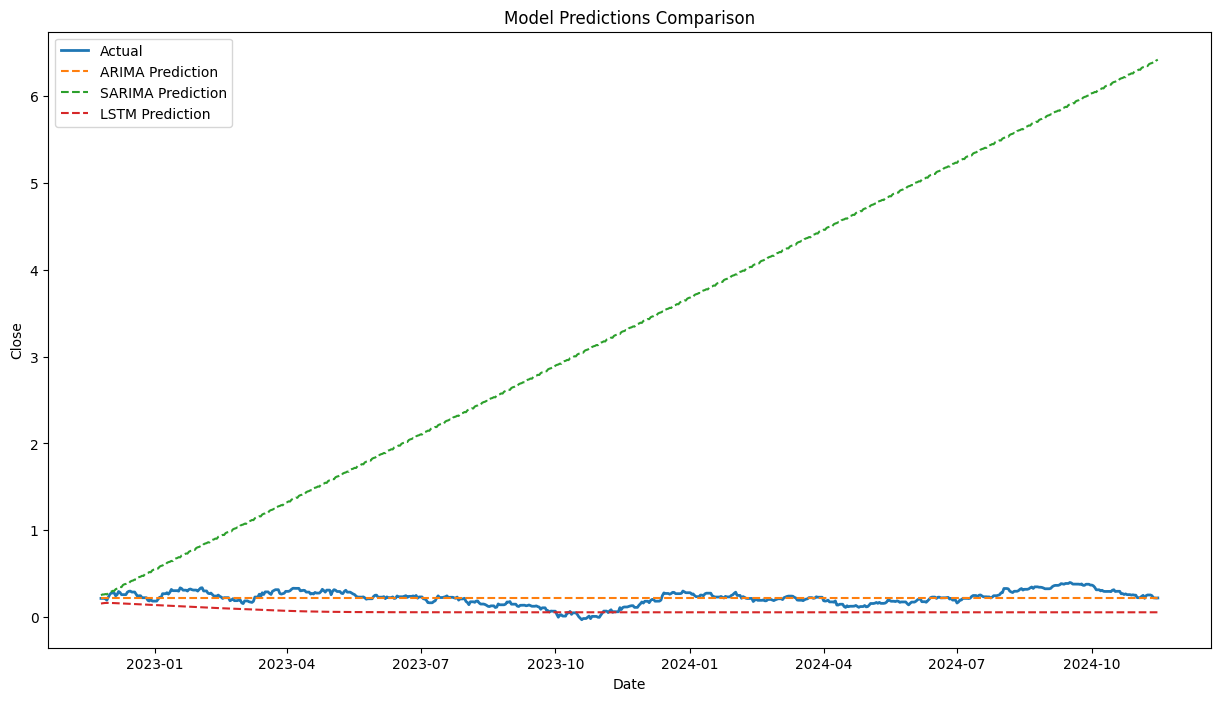

In [9]:
trainer.plot_result()

**Step 7: Forecast the next 6-12 months and save the forecast to csv with confidence interval**

In [10]:
# model_trainer.forecast(months=6, output_file='forecast_6_months.csv')
trainer.forecast(months=12, output_file='../data/bnd_forecast_12_months.csv', best_model='LSTM')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━